## Get Head lines (to plot)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

coefficients_df = pd.read_csv('data/a3.csv')

def calculate_rho(theta, coefficients):
    rho = coefficients[0] / 2
    for n in range(1, 13):
        rho += coefficients[n] * np.cos(n * theta)
    return rho


def polar_to_cartesian(theta, Z, coefficients, X0):
    rho = calculate_rho(theta, coefficients)
    X = rho * np.cos(theta) + X0
    Y = rho * np.sin(theta)
    return X, Y, Z


def get_points(coefficients_df):
    points = []
    for index, row in coefficients_df.iterrows():
        # Extract coefficients for the current index
        coefficients = row[['a0', 'a1', 'a2', 'a3', 'a4', 'a5',
                            'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12']].values
        Z = row['Z']

        # Create an array of theta values
        theta_values = np.linspace(0, 2 * np.pi, 360)

        # Calculate the Cartesian coordinates
        points.append(np.array(
            [polar_to_cartesian(theta, Z, coefficients, X0=0) for theta in theta_values]))
    return points


def plot_3d_head_model(coefficients_df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get points
    points = get_points(coefficients_df)

    # Plot the curve
    for point in points:
        ax.plot(point[:, 0], point[:, 1], point[:, 2], color='red')

    # Set labels and show the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

    # points_to_stl(points, 'head.stl')

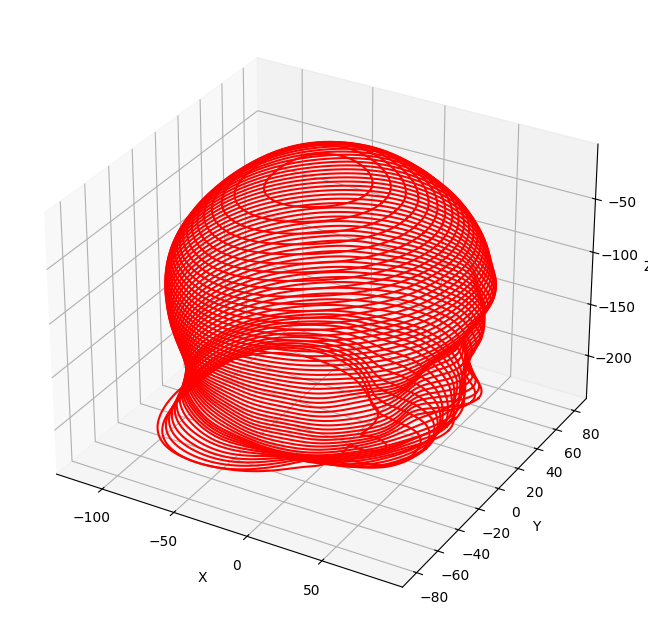

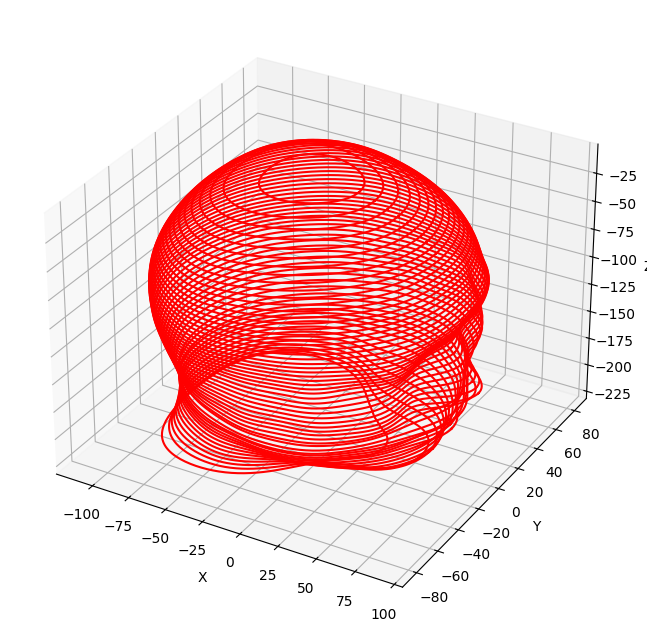

In [16]:
plot_3d_head_model(pd.read_csv('data/a2.csv'))
plot_3d_head_model(pd.read_csv('data/a3.csv'))

## Gen STL file

In [17]:

from stl import mesh
from scipy.spatial import Delaunay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def create_stl_from_points(points, filename='model.stl'):
    delaunay = Delaunay(points[:, :2])
    model_mesh = mesh.Mesh(
        np.zeros(delaunay.simplices.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(delaunay.simplices):
        for j in range(3):
            model_mesh.vectors[i][j] = points[f[j], :]
    model_mesh.save(filename)
    print(f'Model saved to {filename}')


def calculate_rho(theta, coefficients):
    rho = coefficients[0] / 2
    for n in range(1, 13):
        rho += coefficients[n] * np.cos(n * theta)
    return rho


def polar_to_cartesian(theta, Z, coefficients, X0):
    rho = calculate_rho(theta, coefficients)
    X = rho * np.cos(theta) + X0
    Y = rho * np.sin(theta)
    return X, Y, Z


# def get_points(coefficients_df):
#     points = []
#     for index, row in coefficients_df.iterrows():
#         # Extract coefficients for the current index
#         coefficients = row[['a0', 'a1', 'a2', 'a3', 'a4', 'a5',
#                             'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12']].values
#         Z = row['Z']

#         # Create an array of theta values
#         theta_values = np.linspace(0, 2 * np.pi, 360)

#         # Calculate the Cartesian coordinates
#         points.append(np.array(
#             [polar_to_cartesian(theta, Z, coefficients, X0=0) for theta in theta_values]))
#     return points

def get_points(coefficients_df):
    all_points = []
    for index, row in coefficients_df.iterrows():
        # Extract coefficients for the current index
        coefficients = row[['a0', 'a1', 'a2', 'a3', 'a4', 'a5',
                            'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12']].values
        Z = row['Z']

        # Create an array of theta values
        theta_values = np.linspace(0, 2 * np.pi, 360)

        # Calculate the Cartesian coordinates and append them to the points list
        layer_points = np.array(
            [polar_to_cartesian(theta, Z, coefficients, X0=0) for theta in theta_values])
        all_points.append(layer_points)

    # Combine all layer points into a single array
    return np.vstack(all_points)


def plot_3d_head_model(coefficients_df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get points
    points = get_points(coefficients_df)

    # Plot the curve
    for point in points:
        ax.plot(point[:, 0], point[:, 1], point[:, 2], color='red')

    # Set labels and show the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


def create_mesh(points):
    # Create a new mesh (note: this is a very simple object; a real head would require more complex modeling)
    head_mesh = mesh.Mesh(np.zeros(points.shape[0] - 1, dtype=mesh.Mesh.dtype))
    for i in range(len(points) - 1):
        head_mesh.vectors[i] = np.array([points[i], points[i + 1], points[0]])
    return head_mesh

# Function to save the mesh to an STL file


def save_stl(head_mesh, filename):
    head_mesh.save(filename)


if __name__ == '__main__':

    # Now you can pass the 'points' array to 'create_stl_from_points' function
    # create_stl_from_points(points, 'head_model.stl')
    # Uncomment the line above to create the STL file once the 'points' array is correctly formed.

    # Save the mesh to an STL file
    save_stl(create_mesh(get_points(pd.read_csv('data/a2.csv'))), 'head_a2.stl')
    save_stl(create_mesh(get_points(pd.read_csv('data/a3.csv'))), 'head_a3.stl')